## Get Requirements

In [1]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim
import numpy as np
import matplotlib.pyplot as plt
import h5py
#import helpers
import numpy as np
from pathlib import Path
import torch
from torch.utils import data
# import cv2
import math
from PIL import Image
import random
from torch.utils.data import Dataset, DataLoader
import time
import glob
import scipy.signal
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
print(torch.__version__)

/home/jovyan/conda-envs/sleep_monitoring/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.10.0


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 

device(type='cuda')

### Neptune (Ignore this block)

In [4]:
import neptune.new as neptune

run = neptune.init(
    project="jathurshan0330/V2-Seq-Cros",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJmYmRmNjE0Zi0xMDRkLTRlNzUtYmIxNi03NzM2ODBlZDc5NTMifQ==",
)  # your credentials


https://app.neptune.ai/jathurshan0330/V2-Seq-Cros/e/V2SEQ-46
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [5]:
 experiment = "V2SEQ-39"   #Change This
 !mkdir "/home/mmsm/Experiments/V2_Seq_CMT/V2SEQ-39"  # Change This

mkdir: cannot create directory ‘/home/mmsm/Experiments/V2_Seq_CMT/V2SEQ-39’: File exists


## Data

In [6]:
from Datasets.sleepedf_dataset import read_h5py

In [7]:
def split_data(data_list,train_list,val_list):
    data_list = np.array(data_list)
    train_data_list = data_list[train_list]
    val_data_list = data_list[val_list]
    return train_data_list, val_data_list

In [8]:
train_data_list = [0,2,3,4]  #4
val_data_list = [1]  #4
path = "/home/mmsm/Sleep_EDF_Dataset"

eeg_list = glob.glob(f'{path}/x*.h5')
eeg_list.sort()
[train_eeg_list, val_eeg_list] = split_data(eeg_list,train_data_list,val_data_list)
print(train_eeg_list)
print(val_eeg_list)

mean_eeg_list = glob.glob(f'{path}/mean*.h5')
mean_eeg_list.sort()
[train_mean_eeg_list, val_mean_eeg_list] = split_data(mean_eeg_list,train_data_list,val_data_list)
print(train_mean_eeg_list)
print(val_mean_eeg_list)

sd_eeg_list = glob.glob(f'{path}/std*.h5')
sd_eeg_list.sort()
[train_sd_eeg_list, val_sd_eeg_list] = split_data(sd_eeg_list,train_data_list,val_data_list)
print(train_sd_eeg_list)
print(val_sd_eeg_list)

#########################################################################################################################

eog_list = glob.glob(f'{path}/eog*.h5')
eog_list.sort()
[train_eog_list, val_eog_list] = split_data(eog_list,train_data_list,val_data_list)
print(train_eog_list)
print(val_eog_list)

mean_eog_list = glob.glob(f'{path}/eog_m*.h5')
mean_eog_list.sort()
[train_mean_eog_list, val_mean_eog_list] = split_data(mean_eog_list,train_data_list,val_data_list)
print(train_mean_eog_list)
print(val_mean_eog_list)

sd_eog_list = glob.glob(f'{path}/eog_s*.h5')
sd_eog_list.sort()
[train_sd_eog_list, val_sd_eog_list] = split_data(sd_eog_list,train_data_list,val_data_list)
print(train_sd_eog_list)
print(val_sd_eog_list)



eeg2_list = glob.glob(f'{path}/eeg*.h5')
eeg2_list.sort()
[train_eeg2_list, val_eeg2_list] = split_data(eeg2_list,train_data_list,val_data_list)
print(train_eeg2_list)
print(val_eeg2_list)

mean_eeg2_list = glob.glob(f'{path}/eeg_m*.h5')
mean_eeg2_list.sort()
[train_mean_eeg2_list, val_mean_eeg2_list] = split_data(mean_eeg2_list,train_data_list,val_data_list)
print(train_mean_eeg2_list)
print(val_mean_eeg2_list)

sd_eeg2_list = glob.glob(f'{path}/eeg_s*.h5')
sd_eeg2_list.sort()
[train_sd_eeg2_list, val_sd_eeg2_list] = split_data(sd_eeg2_list,train_data_list,val_data_list)
print(train_sd_eeg2_list)
print(val_sd_eeg2_list)



label_list = glob.glob(f'{path}/y*.h5')
label_list.sort()
[train_label_list, val_label_list] = split_data(label_list,train_data_list,val_data_list)
print(train_label_list)
print(val_label_list)


print(val_data_list)

['/home/mmsm/Sleep_EDF_Dataset/x1.h5' '/home/mmsm/Sleep_EDF_Dataset/x3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/x4.h5' '/home/mmsm/Sleep_EDF_Dataset/x5.h5']
['/home/mmsm/Sleep_EDF_Dataset/x2.h5']
['/home/mmsm/Sleep_EDF_Dataset/mean1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/mean3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/mean4.h5'
 '/home/mmsm/Sleep_EDF_Dataset/mean5.h5']
['/home/mmsm/Sleep_EDF_Dataset/mean2.h5']
['/home/mmsm/Sleep_EDF_Dataset/std1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/std3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/std4.h5'
 '/home/mmsm/Sleep_EDF_Dataset/std5.h5']
['/home/mmsm/Sleep_EDF_Dataset/std2.h5']
['/home/mmsm/Sleep_EDF_Dataset/eog1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog4.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog5.h5']
['/home/mmsm/Sleep_EDF_Dataset/eog2.h5']
['/home/mmsm/Sleep_EDF_Dataset/eog_m1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog_m3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog_m4.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog_m5.h5']
['/home/mmsm/Sleep_EDF_Dataset

In [9]:
class SleepEDF_Seq_MultiChan_Dataset(Dataset):
    def __init__(self, eeg_file, eog_file, label_file, device, mean_eeg_l = None, sd_eeg_l = None, 
                 mean_eog_l = None, sd_eog_l = None, mean_eeg2_l = None, sd_eeg2_l = None,transform=None, 
                 target_transform=None, sub_wise_norm = False, data_type = None, num_seq = 5):
        """
      
        """
        # Get the data
        for i in range(len(eeg_file)):
          if i == 0:
            self.eeg = read_h5py(eeg_file[i])
            self.eog = read_h5py(eog_file[i])
            # self.eeg2 = read_h5py(eeg2_file[i])

            self.labels = read_h5py(label_file[i])
          else:
            self.eeg = np.concatenate((self.eeg, read_h5py(eeg_file[i])),axis = 0)
            self.eog = np.concatenate((self.eog, read_h5py(eog_file[i])),axis = 0)
            # self.eeg2 = np.concatenate((self.eeg2, read_h5py(eeg2_file[i])),axis = 0)
            self.labels = np.concatenate((self.labels, read_h5py(label_file[i])),axis = 0)

        self.labels = torch.from_numpy(self.labels)
        if data_type == 'train':   # Removing wake epochs
          wake = np.array(np.where(self.labels == 0))
          print(wake.shape)
          wake = random.choices(wake[0], k = int(wake.shape[1]*0.65))
          print(len(wake))
          self.labels = np.delete(self.labels,obj = wake,axis = 0)
          self.eeg = np.delete(self.eeg,obj = wake,axis = 0)
          self.eog = np.delete(self.eog,obj = wake,axis = 0)

        bin_labels = np.bincount(self.labels)
        print(f"Labels count: {bin_labels}")
        print(f"Labels count weights: {1/bin_labels}")
        print(f"Shape of EEG : {self.eeg.shape} , EOG : {self.eog.shape}")#, EMG: {self.eeg2.shape}")
        print(f"Shape of Labels : {self.labels.shape}")

        if sub_wise_norm == True:
          print(f"Reading Subject wise mean and sd")
          for i in range(len(mean_eeg_l)):
            if i == 0:
              self.mean_eeg  = read_h5py(mean_eeg_l[i])
              self.sd_eeg = read_h5py(sd_eeg_l[i])
              self.mean_eog  = read_h5py(mean_eog_l[i])
              self.sd_eog = read_h5py(sd_eog_l[i])
              # self.mean_eeg2  = read_h5py(mean_eeg2_l[i])
              # self.sd_eeg2 = read_h5py(sd_eeg2_l[i])
            else:
              self.mean_eeg = np.concatenate((self.mean_eeg, read_h5py(mean_eeg_l[i])),axis = 0)
              self.sd_eeg = np.concatenate((self.sd_eeg, read_h5py(sd_eeg_l[i])),axis = 0)
              self.mean_eog = np.concatenate((self.mean_eog, read_h5py(mean_eog_l[i])),axis = 0)
              self.sd_eog = np.concatenate((self.sd_eog, read_h5py(sd_eog_l[i])),axis = 0)
              # self.mean_eeg2 = np.concatenate((self.mean_eeg2, read_h5py(mean_eeg2_l[i])),axis = 0)
              # self.sd_eeg2 = np.concatenate((self.sd_eeg2, read_h5py(sd_eeg2_l[i])),axis = 0)
          if data_type == 'train':   # Removing wake epochs
            self.mean_eeg = np.delete(self.mean_eeg,obj = wake,axis = 0)
            self.sd_eeg = np.delete(self.sd_eeg,obj = wake,axis = 0)
            self.mean_eog = np.delete(self.mean_eog,obj = wake,axis = 0)
            self.sd_eog = np.delete(self.sd_eog,obj = wake,axis = 0)
          
          print(f"Shapes of Mean  : EEG: {self.mean_eeg.shape}, EOG : {self.mean_eog.shape}")#, EMG : {self.mean_eeg2.shape}")
          print(f"Shapes of Sd  : EEG: {self.sd_eeg.shape}, EOG : {self.sd_eog.shape}")#, EMG : {self.sd_eeg2.shape}")
        else:     
          self.mean = mean_l
          self.sd = sd_l
          print(f"Mean : {self.mean} and SD {self.sd}")  

        self.sub_wise_norm = sub_wise_norm
        self.device = device
        self.transform = transform
        self.target_transform = target_transform
        self.num_seq = num_seq

    def __len__(self):
        return len(self.labels) - self.num_seq

    def __getitem__(self, idx):
        eeg_data = self.eeg[idx:idx+self.num_seq].squeeze()   
        eog_data = self.eog[idx:idx+self.num_seq].squeeze() 
        # eeg2_data = self.eeg2[idx]            
        # print(data.shape)
        label = self.labels[idx:idx+self.num_seq,]   #######
        # label = self.labels[idx]
        if self.sub_wise_norm ==True:
          eeg_data = (eeg_data - self.mean_eeg[idx]) / self.sd_eeg[idx]
          eog_data = (eog_data - self.mean_eog[idx]) / self.sd_eog[idx]
          # eeg2_data = (eeg2_data - self.mean_eeg2[idx]) / self.sd_eeg2[idx]
        elif self.mean and self.sd:
          eeg_data = (eeg_data-self.mean[0])/self.sd[0]
          eog_data = (eog_data-self.mean[1])/self.sd[1]
          # eeg2_data = (eeg2_data-self.mean[2])/self.sd[2]
        if self.transform:
            eeg_data = self.transform(eeg_data)
            eog_data = self.transform(eog_data)
            # eeg2_data = self.transform(eeg2_data)
        if self.target_transform:
            label = self.target_transform(label)
        return eeg_data, eog_data, label

In [10]:
num_seq = 5
train_dataset = SleepEDF_Seq_MultiChan_Dataset(eeg_file = train_eeg_list , 
                                           eog_file = train_eog_list, 
                                           label_file = train_label_list, 
                                           device = device, mean_eeg_l = train_mean_eeg_list, sd_eeg_l = train_sd_eeg_list, 
                                           mean_eog_l = train_mean_eog_list, sd_eog_l = train_sd_eog_list, 
                                           sub_wise_norm = True, #data_type = 'train',
                                           num_seq = num_seq,
                                           transform=transforms.Compose([
                                               transforms.ToTensor(),
                                                # #  transforms.Normalize(
                                                #     (0.5,), (0.5,))
                                                ]) )

val_dataset = SleepEDF_Seq_MultiChan_Dataset(eeg_file = val_eeg_list ,
                                         eog_file = val_eog_list, 
                                         label_file = val_label_list, 
                                         device = device, mean_eeg_l = val_mean_eeg_list, sd_eeg_l = val_sd_eeg_list,
                                         mean_eog_l = val_mean_eog_list, sd_eog_l = val_sd_eog_list,
                                         sub_wise_norm = True, num_seq = num_seq,
                                         transform=transforms.Compose([
                                               transforms.ToTensor(),
                                                # #  transforms.Normalize(
                                                #     (0.5,), (0.5,))
                                                ]) )

Reading from /home/mmsm/Sleep_EDF_Dataset/x1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 43754
Shape of each data : (43754, 1, 3000)
Reading from /home/mmsm/Sleep_EDF_Dataset/eog1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['eog']>
Number of samples : 43754
Shape of each data : (43754, 1, 3000)
Reading from /home/mmsm/Sleep_EDF_Dataset/y1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['y']>
Number of samples : 43754
Shape of each data : (43754,)
Reading from /home/mmsm/Sleep_EDF_Dataset/x3.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 35373
Shape of each data : (35373, 1, 3000)
Reading from /home/mmsm/Sleep_EDF_Dataset/eog3.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['eog']>
Number of samp

In [11]:
batch_size = 32
train_data_loader = data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_data_loader = data.DataLoader(val_dataset, batch_size = 16, shuffle = True)

EEG batch shape: torch.Size([32, 1, 5, 3000])
EOG batch shape: torch.Size([32, 1, 5, 3000])
Labels batch shape: torch.Size([32, 5])


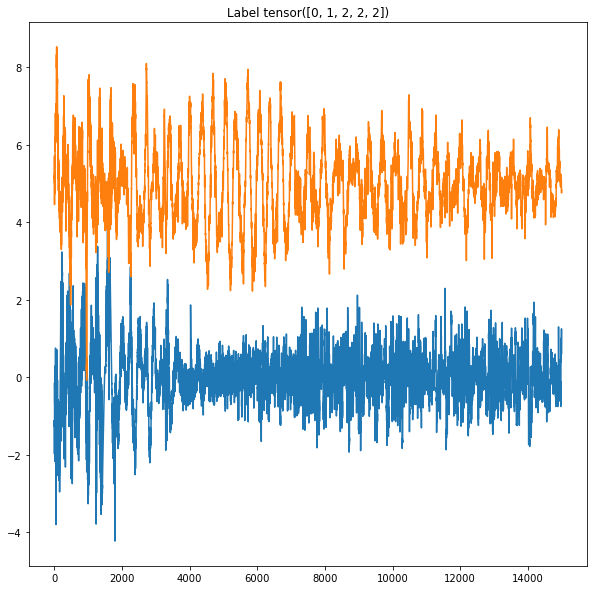

EEG batch shape: torch.Size([16, 1, 5, 3000])
EOG batch shape: torch.Size([16, 1, 5, 3000])
Labels batch shape: torch.Size([16, 5])


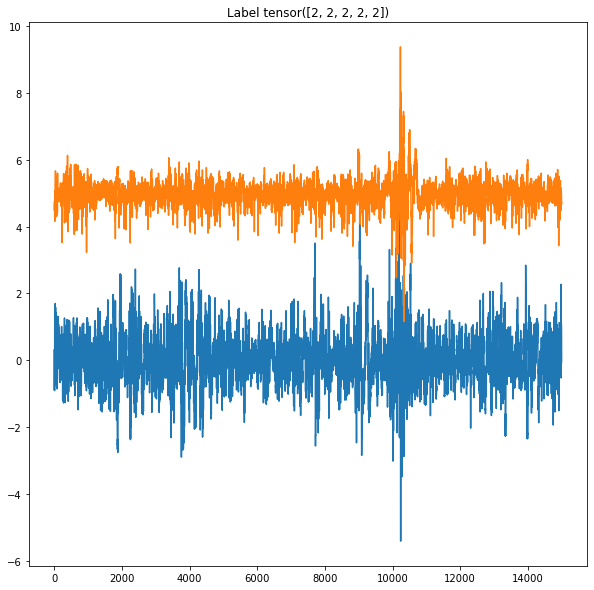

EEG Minimum :-12.035351575005468
EEG Maximum :7.484144759615524
EOG Minimum :-12.170351524695338
EOG Maximum :10.598884577913207
EEG Mean :-0.0003391743472961096
EEG Standard Deviation :1.1251427541536312
EOG Mean :-0.0005616896189637254
EOG Standard Deviation :1.297613394982694


In [12]:
eeg_data, eog_data, label = next(iter(train_data_loader))
print(f"EEG batch shape: {eeg_data.size()}")
print(f"EOG batch shape: {eog_data.size()}")
# print(f"EMG batch shape: {eeg2_data.size()}")
print(f"Labels batch shape: {label.size()}")

eeg_data_temp = torch.reshape(eeg_data[0],(1,eeg_data[0].shape[1]*eeg_data[0].shape[2]))
eog_data_temp = torch.reshape(eog_data[0],(1,eog_data[0].shape[1]*eog_data[0].shape[2]))

t = np.arange(0,30,1/100)
plt.figure(figsize = (10,10))
plt.plot(eeg_data_temp[0].squeeze())
plt.plot(eog_data_temp[0].squeeze()+5)
# plt.plot(t,eeg2_data[0].squeeze()+10)
plt.title(f"Label {label[0].squeeze()}")
plt.show()

eeg_data, eog_data, label = next(iter(val_data_loader))
print(f"EEG batch shape: {eeg_data.size()}")
print(f"EOG batch shape: {eog_data.size()}")
# print(f"EMG batch shape: {eeg2_data.size()}")
print(f"Labels batch shape: {label.size()}")

eeg_data_temp = torch.reshape(eeg_data[0],(1,eeg_data[0].shape[1]*eeg_data[0].shape[2]))
eog_data_temp = torch.reshape(eog_data[0],(1,eog_data[0].shape[1]*eog_data[0].shape[2]))

# t = np.arange(0,30,1/100)
plt.figure(figsize = (10,10))
plt.plot(eeg_data_temp[0].squeeze())
plt.plot(eog_data_temp[0].squeeze()+5)
# plt.plot(t,eeg2_data[0].squeeze()+10)
plt.title(f"Label {label[0].squeeze()}")
plt.show()


print(f"EEG Minimum :{eeg_data.min()}")
print(f"EEG Maximum :{eeg_data.max()}")
print(f"EOG Minimum :{eog_data.min()}")
print(f"EOG Maximum :{eog_data.max()}")
# print(f"EMG Minimum :{eeg2_data.min()}")
# print(f"EMG Maximum :{eeg2_data.max()}")


print(f"EEG Mean :{torch.mean(eeg_data)}")
print(f"EEG Standard Deviation :{torch.std(eeg_data)}")
print(f"EOG Mean :{torch.mean(eog_data)}")
print(f"EOG Standard Deviation :{torch.std(eog_data)}")
# print(f"EMG Mean :{torch.mean(eeg2_data)}")
# print(f"EMG Standard Deviation :{torch.std(eeg2_data)}")



### Classification Model Cross Transformer

In [13]:
import copy
from typing import Optional, Any

import torch
from torch import Tensor
from torch.nn import functional as F
from torch.nn import Module
from torch.nn import MultiheadAttention
from torch.nn import ModuleList
from torch.nn.init import xavier_uniform_
from torch.nn import Dropout
from torch.nn import Linear
from torch.nn import LayerNorm, BatchNorm1d

In [14]:
def _get_clones(module, N):
    return ModuleList([copy.deepcopy(module) for i in range(N)])


def _get_activation_fn(activation):
    if activation == "relu":
        return F.relu
    elif activation == "gelu":
        return F.gelu

    raise RuntimeError("activation should be relu/gelu, not {}".format(activation))

In [15]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [16]:
#input ==> 32, 1, 1, 3000,, b==> batch, e==> embedding, s==> seq length
class Window_Embedding(nn.Module): 
    def __init__(self, in_channels: int = 1, window_size: int = 50, emb_size: int = 64):
        super(Window_Embedding, self).__init__()

        self.projection_1 =  nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//4, kernel_size = window_size, stride = window_size),
            nn.LeakyReLU(),
            nn.BatchNorm1d(emb_size//4),
            # Rearrange('b e s -> b s e'),
            )
        self.projection_2 =  nn.Sequential(#################
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//8, kernel_size = 5, stride = 5),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//8, emb_size//4, kernel_size = 5, stride = 5),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//4, (emb_size-emb_size//4)//2, kernel_size = 2, stride = 2),
            nn.LeakyReLU(),
            nn.BatchNorm1d((emb_size-emb_size//4)//2),
            # Rearrange('b e s -> b s e'),
            )
        
        self.projection_3 =  nn.Sequential(#################
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//4, kernel_size = 25, stride = 25),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//4, (emb_size-emb_size//4)//2, kernel_size =2, stride = 2),
            nn.LeakyReLU(),
            nn.BatchNorm1d((emb_size-emb_size//4)//2),
            # Rearrange('b e s -> b s e'),
            )
        
        
        self.projection_4 = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(emb_size, emb_size, kernel_size = 1, stride = 1),
            nn.LeakyReLU(),
            nn.BatchNorm1d(emb_size),
            Rearrange('b e s -> b s e'),)
            
        #in=>B,64,60 out=>B,64,61
        self.cls_token = nn.Parameter(torch.randn(1,1, emb_size))
        self.arrange1 = Rearrange('b s e -> s b e')
        #in=>61,B,64 out=>61,B,64
        self.pos = PositionalEncoding(d_model=emb_size)
        #in=>61,B,64 out=>B,61,64
        self.arrange2 = Rearrange('s b e -> b s e ')

    def forward(self, x: Tensor) -> Tensor:
        if x.shape[0]!=1:
            x = x.squeeze().unsqueeze(dim = 1)
        # print(x.shape)
        b,_, _ = x.shape
        x_1 = self.projection_1(x)  ########################
        x_2 = self.projection_2(x) ###########
        x_3 = self.projection_3(x) 
        # print(x_local.shape,x_global.shape)
        x = torch.cat([x_1,x_2,x_3],dim = 1)##### 2)
        x = self.projection_4(x) 
        # print(x.shape)
        cls_tokens = repeat(self.cls_token, '() s e -> b s e', b=b)
        # print(cls_tokens.shape)
        # prepend the cls token to the input
        x = torch.cat([cls_tokens, x], dim=1)
        # print(x.shape)
        # add position embedding
        x = self.arrange1(x)
        # print(x.shape)
        x = self.pos(x)
        # print(x.shape)
        x = self.arrange2(x)
        # print(x.shape)
        return x




In [17]:
#input ==>(b,s,e)=>(32, 61, 64,) 
# b==> batch, s==> seq length, e==> embedding, 
class Intra_modal_atten(nn.Module): 
    def __init__(self, d_model=64, nhead=8, dropout=0.1,
                 layer_norm_eps=1e-5, window_size = 25, First = True,
                 device=None, dtype=None) -> None:
        super(Intra_modal_atten, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}
       
        if First == True:
            self.window_embed = Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)  
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True,
                                            **factory_kwargs)
        self.dropout = Dropout(dropout) 
        self.First = First

    def forward(self, x: Tensor) -> Tensor:
        if self.First == True:
            src = self.window_embed(x)
        else:
            src = x
        # print(src.shape)
        # src = self.norm(src)  #####
        # print(src.shape)
        src2 = self.self_attn(src, src, src)[0]
        # print(src2.shape)
        out = src + self.dropout(src2)
        out = self.norm(out)   ########
        return out                                
    

In [18]:
##Cross Modal Attention
#input ==>(b,s,e)=>(32, 2, 64,) ==> Class tokens of EEG and EOG after intra modal attention
# b==> batch, s==> seq length, e==> embedding, 
class Cross_modal_atten(nn.Module): 
    def __init__(self, d_model=64, nhead=8, dropout=0.1,
                 layer_norm_eps=1e-5, First = False,
                 device=None, dtype=None) -> None:

        super(Cross_modal_atten, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}

        if First == True:
            self.cls_token = nn.Parameter(torch.randn(1,1, d_model)) ######
        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)  
        self.cross_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True,
                                            **factory_kwargs)
        self.dropout = Dropout(dropout) 
        self.First = First

    def forward(self, x1: Tensor,x2: Tensor) -> Tensor:
        # print(x1.shape,x2.shape)
        if len(x1.shape) == 2:
            x = torch.cat([x1.unsqueeze(dim=1), x2.unsqueeze(dim=1)], dim=1)
        else:
            x = torch.cat([x1, x2.unsqueeze(dim=1)], dim=1)
        # print(x.shape)
        b,_, _ = x.shape
        if self.First == True:
            cls_tokens = repeat(self.cls_token, '() s e -> b s e', b=b)  ######
            # print(cls_tokens.shape)
            # prepend the cls token to the input
            src = torch.cat([cls_tokens, x], dim=1)  #####
        else:
            src = x
        # print(src.shape)
        # src = self.norm(src)#####(src)
        # print(src.shape)
        src2 = self.cross_attn(src, src, src)[0]
        # print(src2.shape)
        out = src + self.dropout(src2)
        out = self.norm(out)
        return out  

In [19]:
##Feed Forward Networks
#input ==>(b,s,e)=>(32, 61, 64,) 
# b==> batch, s==> seq length, e==> embedding, 
class Feed_forward(nn.Module): 
    def __init__(self, d_model=64,dropout=0.1,dim_feedforward=512,
                 layer_norm_eps=1e-5,
                 device=None, dtype=None) -> None:

        super(Feed_forward, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}

        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.linear1 = Linear(d_model, dim_feedforward, **factory_kwargs)
        self.relu = nn.ReLU()
        self.dropout1 = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model, **factory_kwargs)
        self.dropout2 = Dropout(dropout)
        
    def forward(self, x: Tensor) -> Tensor:
        # print(x.shape)
        # src = self.norm(x)  ######
        src = x
        # print(src.shape)
        src2 = self.linear2(self.dropout1(self.relu(self.linear1(src))))
        # print(src2.shape)
        out = src + self.dropout2(src2)
        out = self.norm(out)
        return out

In [20]:
# import torch.optim as optim

# Net_test = Intra_modal_atten(window_size=50).to(device)
# Net_test2 = Cross_modal_atten().to(device)
# Net_test3 = Feed_forward().to(device)

# pred1 = Net_test(eeg_data.float().to(device))
# print(pred1.shape)

# pred = Net_test2(pred1[:,0,:],pred1[:,0,:])
# print(pred.shape)

# pred = Net_test3(pred1)
# print(pred.shape)

In [21]:
# # Best Model so far fine tuning
# class Epoch_Cross_Transformer(nn.Module):
#     def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
#         super(Epoch_Cross_Transformer, self).__init__()
        
#         self.eeg_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
#                                             window_size =window_size, First = True )
#         self.eog_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
#                                             window_size =window_size, First = True )
        
#         self.cross_atten = Cross_modal_atten(d_model=d_model, nhead=8, dropout=0.1, First = True )
        
#         self.eeg_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
#         self.eog_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)


#         # self.mlp    = nn.Sequential(nn.Flatten(),
#         #                             nn.Linear(d_model*2,5))  ##################
#         # 

#     def forward(self, eeg: Tensor,eog: Tensor):#,finetune = False): 
#         self_eeg = self.eeg_atten(eeg)
#         self_eog = self.eog_atten(eog)

#         cross = self.cross_atten(self_eeg[:,0,:],self_eog[:,0,:])

#         cross_cls = cross[:,0,:].unsqueeze(dim=1)
#         cross_eeg = cross[:,1,:].unsqueeze(dim=1)
#         cross_eog = cross[:,2,:].unsqueeze(dim=1)

#         eeg_new =  torch.cat([cross_cls, self_eeg[:,1:,:]], dim=1)
#         eog_new =  torch.cat([cross_cls, self_eog[:,1:,:]], dim=1)

#         ff_eeg = self.eeg_ff(eeg_new)
#         ff_eog = self.eog_ff(eog_new)

        

#         # cls_out = torch.cat([cross_cls[:,0,:],ff_eeg[:,0,:], ff_eog[:,0,:]], dim=1).unsqueeze(dim=1) ######
#         cls_out = torch.cat([ff_eeg[:,0,:].unsqueeze(dim=1) , ff_eog[:,0,:].unsqueeze(dim=1)], dim=1)

#         feat_list = [cross_cls,ff_eeg,ff_eog]  
          
#         return cls_out,feat_list

In [22]:
# class Seq_Cross_Transformer_Network(nn.Module):
#     def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
#         super(Seq_Cross_Transformer_Network, self).__init__()
        
#         self.epoch_eeg = Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
#         self.epoch_eog = Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
 
#         # self.epoch_2_eeg =  Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
#         # self.epoch_2_eog =  Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
        
#         # self.epoch_3_eeg =  Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
#         # self.epoch_3_eog =  Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
        
#         # self.epoch_4_eeg =  Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
#         # self.epoch_4_eog =  Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
        
#         # self.epoch_5_eeg =  Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
#         # self.epoch_5_eog =  Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
        
#         self.eeg_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
#                                             window_size =window_size, First = False )
#         self.eog_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
#                                             window_size =window_size, First = False )
        
#         self.cross_atten = Cross_modal_atten(d_model=d_model, nhead=8, dropout=0.1, First = True )
        
#         self.eeg_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
#         self.eog_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)

#         self.mlp    = nn.Sequential(nn.Flatten(),
#                                     nn.Linear(d_model*2,5))

#         # self.mlp1    = nn.Sequential(nn.Linear(120,1),
#         #                             nn.Flatten(),
#         #                             nn.Linear(d_model,5))  
#         # self.mlp2    = nn.Sequential(nn.Linear(120,1),
#         #                             nn.Flatten(),
#         #                             nn.Linear(d_model,5)) 
#         # self.mlp3    = nn.Sequential(nn.Linear(120,1), nn.Flatten(),
#         #                             nn.Linear(d_model,5)) 
#         # self.mlp4    = nn.Sequential(nn.Linear(120,1),nn.Flatten(),
#         #                             nn.Linear(d_model,5)) 
#         # self.mlp5    = nn.Sequential(nn.Linear(120,1),nn.Flatten(),
#         #                             nn.Linear(d_model,5)) 
        
        

#     def forward(self, eeg: Tensor,eog: Tensor,num_seg = 5) -> Tensor:
#         eeg_epoch = eeg[:,:,0,:]
#         eog_epoch = eog[:,:,0,:]
#         for ep in range(1,num_seg):
#             eeg_epoch = torch.cat((eeg_epoch,eeg[:,:,ep,:]),dim=-1)
#             eog_epoch = torch.cat((eog_epoch,eog[:,:,ep,:]),dim=-1)
#         # print(f"Shape of Epoch  In: {eeg_epoch.shape, eog_epoch.shape}")

#         self_epoch_eeg = self.epoch_eeg(eeg_epoch)
#         self_epoch_eog = self.epoch_eog(eeg_epoch)

#         # self_epoch2_eeg = self.epoch_2_eeg(eeg[:,:,1,:])
#         # self_epoch2_eog = self.epoch_2_eog(eog[:,:,1,:])

#         # self_epoch3_eeg = self.epoch_3_eeg(eeg[:,:,2,:])
#         # self_epoch3_eog = self.epoch_3_eog(eog[:,:,2,:])

#         # self_epoch4_eeg = self.epoch_4_eeg(eeg[:,:,3,:])
#         # self_epoch4_eog = self.epoch_4_eog(eog[:,:,3,:])

#         # self_epoch5_eeg = self.epoch_5_eeg(eeg[:,:,4,:])
#         # self_epoch5_eog = self.epoch_5_eog(eog[:,:,4,:])

#         # print(f"Shape of Epoch  Out: {self_epoch_eeg.shape, self_epoch_eog.shape}")

#         # eeg_seq = torch.cat((self_epoch1_eeg,self_epoch2_eeg,
#         #                     self_epoch3_eeg, self_epoch4_eeg,
#         #                     self_epoch5_eeg),dim = -1)
        
#         # eog_seq = torch.cat((self_epoch1_eog,self_epoch2_eog,
#         #                     self_epoch3_eog, self_epoch4_eog,
#         #                     self_epoch5_eog),dim = -1)
#         # print(f"Shape of Epoch Out(After concat): {eeg_seq.shape,eog_seq.shape}")

#         # ######CMT##
#         self_eeg = self.eeg_atten(self_epoch_eeg)
#         self_eog = self.eog_atten(self_epoch_eog)

#         cross = self.cross_atten(self_eeg[:,0,:],self_eog[:,0,:])

#         cross_cls = cross[:,0,:].unsqueeze(dim=1)
#         cross_eeg = cross[:,1,:].unsqueeze(dim=1)
#         cross_eog = cross[:,2,:].unsqueeze(dim=1)

#         eeg_new =  torch.cat([cross_cls, self_eeg[:,1:,:]], dim=1)
#         eog_new =  torch.cat([cross_cls, self_eog[:,1:,:]], dim=1)

#         ff_eeg = self.eeg_ff(eeg_new)
#         ff_eog = self.eog_ff(eog_new)
#         cls_out = torch.cat([cross_cls[:,0,:],ff_eeg[:,0,:], ff_eog[:,0,:]], dim=1).unsqueeze(dim=1)
#         # print(ff_eeg.shape,ff_eog.shape)
        
        
#         # out1 = self.mlp1(torch.moveaxis(torch.cat((eeg_new[:,1:61,:],eog_new[:,1:61,:]),dim=1),-1,-2))
#         # out2 = self.mlp2(torch.moveaxis(torch.cat((eeg_new[:,61:121,:],eog_new[:,61:121,:]),dim=1),-1,-2))
#         # out3 = self.mlp3(torch.moveaxis(torch.cat((eeg_new[:,121:181,:],eog_new[:,121:181,:]),dim=1),-1,-2))
#         # out4 = self.mlp4(torch.moveaxis(torch.cat((eeg_new[:,181:241,:],eog_new[:,181:241,:]),dim=1),-1,-2))
#         # out5 = self.mlp5(torch.moveaxis(torch.cat((eeg_new[:,241:301,:],eog_new[:,241:301,:]),dim=1),-1,-2))

#         # out = torch.cat((out1,out2,out3,out4,out5))  
#         cls_out = torch.cat([ff_eeg[:,0,:], ff_eog[:,0,:]], dim=1).unsqueeze(dim=1) 
#         out = self.mlp(cls_out)
#         return out

In [23]:
# class Seq_Cross_Transformer_Network(nn.Module):
#     def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
#         super(Seq_Cross_Transformer_Network, self).__init__()
        
#         self.epoch_cmt_1 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward = dim_feedforward,
#                                                    window_size = window_size)
#         self.epoch_cmt_2 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward = dim_feedforward,
#                                                    window_size = window_size)
#         self.epoch_cmt_3 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward = dim_feedforward,
#                                                    window_size = window_size)
#         self.epoch_cmt_4 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward = dim_feedforward,
#                                                    window_size = window_size)                                           
#         self.epoch_cmt_5 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward = dim_feedforward,
#                                                    window_size = window_size)  

#         self.seq_eeg_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
#                                             window_size =window_size, First = False )
#         self.seq_eog_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
#                                             window_size =window_size, First = False )
        
#         self.seq_cross_atten = Cross_modal_atten(d_model=d_model, nhead=8, dropout=0.1, First = False )

#         self.seq_eeg_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
#         self.seq_eog_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)


#         self.mlp1    = nn.Sequential(nn.Flatten(),
#                                     nn.Linear(d_model*2,5))  
#         self.mlp2    = nn.Sequential(nn.Flatten(),
#                                     nn.Linear(d_model*2,5)) 
#         self.mlp3    = nn.Sequential(nn.Flatten(),
#                                     nn.Linear(d_model*2,5)) 
#         self.mlp4    = nn.Sequential(nn.Flatten(),
#                                     nn.Linear(d_model*2,5)) 
#         self.mlp5    = nn.Sequential(nn.Flatten(),
#                                     nn.Linear(d_model*2,5)) 
        
        

#     def forward(self, eeg: Tensor,eog: Tensor) -> Tensor: 
#         self_epoch1 = self.epoch_cmt_1(eeg[:,:,0,:],eog[:,:,0,:])[0]
#         self_epoch2 = self.epoch_cmt_2(eeg[:,:,1,:],eog[:,:,1,:])[0]
#         self_epoch3 = self.epoch_cmt_3(eeg[:,:,2,:],eog[:,:,2,:])[0]
#         self_epoch4 = self.epoch_cmt_4(eeg[:,:,3,:],eog[:,:,3,:])[0]
#         self_epoch5 = self.epoch_cmt_5(eeg[:,:,4,:],eog[:,:,4,:])[0]
#         # print(f"Shape of Epoch CMT Out: {self_epoch1.shape}")

#         eeg_seq = torch.cat((self_epoch1[:,0,:].unsqueeze(dim=1),self_epoch2[:,0,:].unsqueeze(dim=1),
#                             self_epoch3[:,0,:].unsqueeze(dim=1), self_epoch4[:,0,:].unsqueeze(dim=1),
#                             self_epoch5[:,0,:].unsqueeze(dim=1)),dim = 1)
        
#         eog_seq = torch.cat((self_epoch1[:,1,:].unsqueeze(dim=1),self_epoch2[:,1,:].unsqueeze(dim=1),
#                             self_epoch3[:,1,:].unsqueeze(dim=1), self_epoch4[:,1,:].unsqueeze(dim=1),
#                             self_epoch5[:,1,:].unsqueeze(dim=1)),dim = 1)
#         # print(f"Shape of Epoch CMT Out(After concat): {eeg_seq.shape,eog_seq.shape}")

#         self_seq_eeg = self.seq_eeg_atten(eeg_seq)
#         self_seq_eog = self.seq_eog_atten(eog_seq)
#         self_seq_eeg = self.seq_eeg_atten(self_seq_eeg)
#         self_seq_eog = self.seq_eog_atten(self_seq_eog)
        
#         out1 = self.mlp1(torch.cat((self_seq_eeg[:,0,:].unsqueeze(dim = 1),self_seq_eog[:,0,:].unsqueeze(dim = 1)),dim=1))
#         out2 = self.mlp2(torch.cat((self_seq_eeg[:,1,:].unsqueeze(dim = 1),self_seq_eog[:,1,:].unsqueeze(dim = 1)),dim=1))
#         out3 = self.mlp3(torch.cat((self_seq_eeg[:,2,:].unsqueeze(dim = 1),self_seq_eog[:,2,:].unsqueeze(dim = 1)),dim=1))
#         out4 = self.mlp4(torch.cat((self_seq_eeg[:,3,:].unsqueeze(dim = 1),self_seq_eog[:,3,:].unsqueeze(dim = 1)),dim=1))
#         out5 = self.mlp5(torch.cat((self_seq_eeg[:,4,:].unsqueeze(dim = 1),self_seq_eog[:,4,:].unsqueeze(dim = 1)),dim=1))

#         out = torch.cat((out1,out2,out3,out4,out5))  
#         return out

In [24]:
# Best Model so far fine tuning
class Epoch_Cross_Transformer(nn.Module):
    def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
        super(Epoch_Cross_Transformer, self).__init__()
        
        self.eeg_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
                                            window_size =window_size, First = True )
        self.eog_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
                                            window_size =window_size, First = True )
        
        self.cross_atten = Cross_modal_atten(d_model=d_model, nhead=8, dropout=0.1, First = True )
        
        

    def forward(self, eeg: Tensor,eog: Tensor):#,finetune = False): 
        self_eeg = self.eeg_atten(eeg)
        self_eog = self.eog_atten(eog)

        cross = self.cross_atten(self_eeg[:,0,:],self_eog[:,0,:])

        cross_cls = cross[:,0,:].unsqueeze(dim=1)
        cross_eeg = cross[:,1,:].unsqueeze(dim=1)
        cross_eog = cross[:,2,:].unsqueeze(dim=1)

        feat_list = [self_eeg,self_eog]  
          
        return cross_cls,feat_list

In [25]:
# Best Model so far fine tuning
class Seq_Cross_Transformer_Network(nn.Module):
    def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
        super(Seq_Cross_Transformer_Network, self).__init__()
        
        self.epoch_1 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward=dim_feedforward,
                                                window_size = window_size)
        self.epoch_2 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward=dim_feedforward,
                                                window_size = window_size)
        self.epoch_3 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward=dim_feedforward,
                                                window_size = window_size)
        self.epoch_4 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward=dim_feedforward,
                                                window_size = window_size)
        self.epoch_5 = Epoch_Cross_Transformer(d_model = d_model, dim_feedforward=dim_feedforward,
                                                window_size = window_size)
        
        self.seq_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
                                            window_size =window_size, First = False )

        self.ff_net = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)


        self.mlp_1    = nn.Sequential(nn.Flatten(),nn.Linear(d_model,5))  ##################
        self.mlp_2    = nn.Sequential(nn.Flatten(),nn.Linear(d_model,5))
        self.mlp_3    = nn.Sequential(nn.Flatten(),nn.Linear(d_model,5))
        self.mlp_4    = nn.Sequential(nn.Flatten(),nn.Linear(d_model,5))
        self.mlp_5    = nn.Sequential(nn.Flatten(),nn.Linear(d_model,5))   
        # 

    def forward(self, eeg: Tensor,eog: Tensor,num_seg = 5): 
        # eeg_epoch = eeg[:,:,0,:]
        # eog_epoch = eog[:,:,0,:]
        # for ep in range(1,num_seg):
        #     eeg_epoch = torch.cat((eeg_epoch,eeg[:,:,ep,:]),dim=-1)
        #     eog_epoch = torch.cat((eog_epoch,eog[:,:,ep,:]),dim=-1)

        # print(eeg_epoch.shape,eog_epoch.shape)
        epoch_1 = self.epoch_1(eeg[:,:,0,:],eog[:,:,0,:])[0]
        epoch_2 = self.epoch_2(eeg[:,:,1,:],eog[:,:,1,:])[0]
        epoch_3 = self.epoch_3(eeg[:,:,2,:],eog[:,:,2,:])[0]
        epoch_4 = self.epoch_4(eeg[:,:,3,:],eog[:,:,3,:])[0]
        epoch_5 = self.epoch_5(eeg[:,:,4,:],eog[:,:,4,:])[0]
        # print(epoch_1.shape,epoch_5.shape)

        seq =  torch.cat([epoch_1, epoch_2,epoch_3,epoch_4,epoch_5], dim=1)
        seq = self.seq_atten(seq)
        # print(seq.shape)
        seq = self.ff_net(seq)
        # print(seq.shape)
        out_1 = self.mlp_1(seq[:,0,:])
        out_2 = self.mlp_2(seq[:,1,:])
        out_3 = self.mlp_3(seq[:,2,:])
        out_4 = self.mlp_4(seq[:,3,:])
        out_5 = self.mlp_5(seq[:,4,:])

        # print(out_1.shape)
        return [out_1,out_2,out_3,out_4,out_5]
        

### Model Training

In [26]:
import torch.optim as optim

d_model = 256 
dim_feedforward=1024  #
window_size = 50#25 50
Net = Seq_Cross_Transformer_Network(d_model = d_model, dim_feedforward=dim_feedforward,
                                window_size = window_size ).to(device)
# Net = torch.load('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/V2_Seq_CMT/V2SEQ-32/checkpoint_model_best_kappa.pth.tar').to(device)

lr = 0.001#0.001
beta_1 =  0.9    
beta_2 =  0.999    
eps = 1e-9
n_epochs = 1000
weights = torch.tensor([1., 2., 1., 2., 2.]) 
print(f"weights: {weights}")
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(Net.parameters(), lr=lr, betas=(beta_1, beta_2),eps = eps, weight_decay = 0.0001)
# optimizer = torch.optim.AdamW(Net.parameters(), lr=lr, betas=(beta_1, beta_2),eps = eps, weight_decay = 0.0001)


lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5) 
# lr_scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0001, max_lr=0.001,
#                                                 step_size_up=5,step_size_down = 50,mode="triangular",cycle_momentum = False)
 

pred= Net(eeg_data.float().to(device), eog_data.float().to(device))
print(len(pred),pred[0].shape)#,cls_outs.shape,len(feat_list))

weights: tensor([1., 2., 1., 2., 2.])
5 torch.Size([16, 5])


In [27]:
# pytorch_total_params = sum(p.numel() for p in Net.parameters())
# print(f"# of parameters: {pytorch_total_params}")
# pytorch_total_params = sum(p.numel() for p in Net.parameters() if p.requires_grad)
# print(f"# of learnable parameters: {pytorch_total_params}")
from torchsummary import summary
summary(Net,((1, 5, 1, 3000),(1,5,1,3000)))

Layer (type:depth-idx)                        Output Shape              Param #
├─Epoch_Cross_Transformer: 1-1                [-1, 1, 256]              --
|    └─Intra_modal_atten: 2-1                 [-1, 61, 256]             --
|    |    └─Window_Embedding: 3-1             [-1, 61, 256]             107,264
|    |    └─MultiheadAttention: 3-2           [-1, 61, 256]             263,168
|    |    └─Dropout: 3-3                      [-1, 61, 256]             --
|    |    └─LayerNorm: 3-4                    [-1, 61, 256]             512
|    └─Intra_modal_atten: 2-2                 [-1, 61, 256]             --
|    |    └─Window_Embedding: 3-5             [-1, 61, 256]             107,264
|    |    └─MultiheadAttention: 3-6           [-1, 61, 256]             263,168
|    |    └─Dropout: 3-7                      [-1, 61, 256]             --
|    |    └─LayerNorm: 3-8                    [-1, 61, 256]             512
|    └─Cross_modal_atten: 2-3                 [-1, 3, 256]              -

Layer (type:depth-idx)                        Output Shape              Param #
├─Epoch_Cross_Transformer: 1-1                [-1, 1, 256]              --
|    └─Intra_modal_atten: 2-1                 [-1, 61, 256]             --
|    |    └─Window_Embedding: 3-1             [-1, 61, 256]             107,264
|    |    └─MultiheadAttention: 3-2           [-1, 61, 256]             263,168
|    |    └─Dropout: 3-3                      [-1, 61, 256]             --
|    |    └─LayerNorm: 3-4                    [-1, 61, 256]             512
|    └─Intra_modal_atten: 2-2                 [-1, 61, 256]             --
|    |    └─Window_Embedding: 3-5             [-1, 61, 256]             107,264
|    |    └─MultiheadAttention: 3-6           [-1, 61, 256]             263,168
|    |    └─Dropout: 3-7                      [-1, 61, 256]             --
|    |    └─LayerNorm: 3-8                    [-1, 61, 256]             512
|    └─Cross_modal_atten: 2-3                 [-1, 3, 256]              -

In [28]:
# this is for Neptune
parameters = {
    "Experiment" : "V2 Seq Cross Modal Transformer (with Seq Attention)",
    'Model Type' : "Each channel encoded using cnn1d, then cross transformer, then one MLP",# separate MLPs with dropout for wake and sleep",
    'd_model' : d_model,
    'dim_feedforward' : dim_feedforward,
    'window_size ':window_size ,
    'Batch Size': batch_size,
    'Loss': "Weighted Categorical Loss,[1, 2, 1, 2, 2]",  # Check this every time
    'Optimizer' : "Adam",        # Check this every time   
    'Learning Rate': lr,
    'eps' : eps,
    "LR Schduler": "StepLR",
    'Beta 1': beta_1,
    'Beta 2': beta_2,
    'n_epochs': n_epochs,
    'val_set' : val_data_list[0]+1,
    'threshold': 0.5,
    'num seq': num_seq
}
run['model/parameters'] = parameters
run['model/model_architecture'] = Net

### Metrics

In [29]:
from torch.autograd import Variable
from sklearn.metrics import cohen_kappa_score

# def accuracy(outputs, labels, num_seq = 5):
#    #outputs = list with 5 predictions [out1,out2,..,out5]
#    #labels tensor with size (batchsize,5)
#     # m = nn.Softmax(dim=1) #########
#     # outputs = m(outputs)   ########
#     # print(sum(outputs[0,:]))
#     acc = 0
#     for i in range(num_seq):
#       pred = torch.argmax(outputs[i], 1)
#     # print(pred)
#       correct = pred.eq(labels[:,i].view_as(pred)).sum().item()
#       total = int(labels.shape[0])
#       acc+= correct
#     return acc / (total*num_seq)

# def kappa(output, label,num_seq = 5): 
#   kap = 0
#   for i in range(num_seq):
#     pred = torch.argmax(outputs[i], 1)
#     kap+=cohen_kappa_score(label[:,i], pred)
#   return kap/num_seq

def accuracy(outputs, labels):
    # m = nn.Softmax(dim=1) #########
    # outputs = m(outputs)   ########
    # print(sum(outputs[0,:]))
    pred = torch.argmax(outputs, 1)
    # print(pred)
    correct = pred.eq(labels.view_as(pred)).sum().item()
    total = int(labels.shape[0])
    return correct / total

def kappa(output, label):  
  # m = nn.Softmax(dim=1) #########
  # output = m(output)   ########
  preds = torch.argmax(output, 1)
  # y_true = y_targets.cpu().numpy()
  # y_pred = y_preds.cpu().numpy()
  return cohen_kappa_score(label, preds)

# def sensitivity(outputs, labels):
#     #tp/tp+fn
#     t = Variable(torch.Tensor([0.5]))  # threshold
#     preds = (outputs > t).float() * 1
#     tp = torch.sum(preds*labels == 1)
#     fn = torch.sum((abs(preds-1))*labels==1)
#     # print(preds)
#     return tp/(tp+fn) if (tp+fn)!=0 else 0

# def specificity(outputs, labels):
#     #tn/tn+fp
#     t = Variable(torch.Tensor([0.5]))  # threshold
#     preds = (outputs > t).float() * 1
#     tn = torch.sum((abs(preds-1))*(abs(labels-1)) == 1)
#     fp = torch.sum(preds*(abs(labels-1)) ==1)
#     # print(preds)
#     return tn/(tn+fp) if (tn+fp)!=0 else 0

def g_mean(sensitivity, specificity):
    return (sensitivity*specificity)**0.5

In [30]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap,vmin =100 ,vmax = 15000)
    plt.title(title,fontsize = 20)
    # plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize = 15)
        plt.yticks(tick_marks, target_names,fontsize = 15)

    if normalize:
        cm2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 3 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:,}\n{:0.2f}%".format(int(cm[i, j]),cm2[i, j]*100),
                     horizontalalignment="center", verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 13)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label',fontsize = 18)
    plt.xlabel('Predicted label',fontsize = 18)#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [31]:
# batch_size = 10 # nb_samples
# n_classes = 4
# output = torch.randn(batch_size,5) # refer to output after softmax
# lab = torch.randint(0, 5, (batch_size,)) # labels
#print(label)


def confusion_matrix(output, label, n_classes, batch_size, print_conf_mat = False):
    # m = nn.Softmax(dim=1) #########
    # output = m(output)   ########
    preds = torch.argmax(output, 1)
    # print(preds)
    # print(label)
    conf_matrix = torch.zeros(n_classes, n_classes)
    avg_sensitivity = 0
    avg_specificity = 0
    avg_F1_score = 0
    avg_precision = 0
    sens_list = []
    spec_list = []
    F1_list = []
    precision_list = []

    for p, t in zip(preds, label):
        # print(p,t)
        if torch.is_tensor(p):
          p = p.item()#int(p)
          t = int(t.item())#int(label)
        # print(p,t)
        conf_matrix[p, t] += 1
    if print_conf_mat==True:    ##Jathu made this edit
      print(conf_matrix)

      plot_confusion_matrix(cm = conf_matrix.cpu().numpy(),
                      normalize    = True,
                      target_names = ['Wake', 'N1', 'N2','N3','REM'],
                      title        = "Confusion Matrix (5-Class)")
      # plt.figure(figsize=(8, 6))
      # plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
      # plt.title('Confusion Matrix')
      # plt.colorbar()
      # fig, ax = plt.subplots(figsize=(7.5, 7.5))
      # ax.matshow(conf_matrix, cmap=plt.get_cmap('Blues'), alpha=1)
      # for i in range(conf_matrix.shape[0]):
      #     for j in range(conf_matrix.shape[1]):
      #         ax.text(x=j, y=i,s=int(conf_matrix[i, j]), va='center', ha='center', size='xx-large')
 
      # plt.xlabel('Prediction', fontsize=18)
      # plt.ylabel('Ground Truth', fontsize=18)
      # plt.title('Confusion Matrix', fontsize=18)
      # plt.colorbar()
      plt.show()

    TP = conf_matrix.diag()
    for c in range(n_classes):
        idx = torch.ones(n_classes).byte()
        idx[c] = 0
        TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
        FP = conf_matrix[c, idx].sum()
        FN = conf_matrix[idx, c].sum()

        if (TP[c]+FN) != 0:
          sensitivity = (TP[c] / (TP[c]+FN))
        else:
          sensitivity = 0

        if (TN+FP) != 0:
          specificity = (TN / (TN+FP))
        else:
          specificity = 0

        if ((2*TP[c]) + (FN + FP)) !=0:
          F1_score = (2*TP[c])/((2*TP[c]) + (FN + FP))
        else:
          F1_score = 0
        
        if (TP[c]+FP) !=0:
          precision = (TP[c]/(TP[c]+FP))
        else:
          precision = 0


        sens_list.append(float(sensitivity))
        spec_list.append(float(specificity))
        F1_list.append(float(F1_score))
        precision_list.append(float(precision))

        avg_sensitivity += float(sensitivity)
        avg_specificity += float(specificity)
        avg_F1_score += float(F1_score)
        avg_precision +=float(precision)

        # print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))
        # print('Sensitivity = {}'.format(sensitivity))
        # print('Specificity = {}'.format(specificity))
    return sens_list, spec_list,F1_list, precision_list, avg_sensitivity/5, avg_specificity/5, avg_F1_score/5, avg_precision/5 

# confusion_matrix(output, lab,5,batch_size)

### Training

In [32]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count if self.count != 0 else 0

In [33]:
# Training the model
# import warnings
# warnings.filterwarnings("ignore")

best_val_acc = 0
best_val_kappa = 0
for epoch_idx in range(n_epochs):  # loop over the dataset multiple times
    run['train/epoch/learning_Rate'].log(optimizer.param_groups[0]["lr"]) 
    Net.train()
    print(f'===========================================================Training Epoch : [{epoch_idx+1}/{n_epochs}] ===========================================================================================================>')
    batch_time = AverageMeter()
    data_time = AverageMeter()
    
    losses = AverageMeter()
    val_losses = AverageMeter()
    
    train_accuracy = AverageMeter()
    val_accuracy = AverageMeter()

#     train_sensitivity = AverageMeter()
    val_sensitivity = AverageMeter()
    
#     train_specificity = AverageMeter()
    val_specificity = AverageMeter()

#     train_gmean = AverageMeter()
    val_gmean = AverageMeter()

    train_kappa = AverageMeter()
    val_kappa = AverageMeter()

    train_f1_score = AverageMeter()
    val_f1_score = AverageMeter()

#     train_precision = AverageMeter()
    val_precision = AverageMeter()

    class1_sens = AverageMeter()
    class2_sens = AverageMeter()
    class3_sens = AverageMeter()
    class4_sens = AverageMeter()
    class5_sens = AverageMeter()

    class1_spec = AverageMeter()
    class2_spec = AverageMeter()
    class3_spec = AverageMeter()
    class4_spec = AverageMeter()
    class5_spec = AverageMeter()

    class1_f1 = AverageMeter()
    class2_f1 = AverageMeter()
    class3_f1 = AverageMeter()
    class4_f1 = AverageMeter()
    class5_f1 = AverageMeter()

    end = time.time()

    for batch_idx, data_input in enumerate(train_data_loader):
        # get the inputs; data is a list of [inputs, labels]
        data_time.update(time.time() - end)
        eeg,eog, labels = data_input
        cur_batch_size = len(eeg)
        # labels = labels[:,math.ceil(num_seq//2)]
        # labels = torch.reshape(labels,(cur_batch_size*5,))
        # print(np.bincount(labels.numpy()))
        # print(cur_batch_size)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = Net(eeg.float().to(device), eog.float().to(device))

        loss = 0
        for ep in range(num_seq):
          loss += criterion(outputs[ep].cpu(), labels[:,ep])#.to(device))


          train_accuracy.update(accuracy(outputs[ep].cpu(), labels[:,ep]))
          _,_,_,_,sens,spec,f1, prec = confusion_matrix(outputs[ep].cpu(), labels[:,ep], 5, cur_batch_size)
          # train_sensitivity.update(sens)
          # train_specificity.update(spec)
          train_f1_score.update(f1)
          # train_precision.update(prec)
          # train_gmean.update(g_mean(sens, spec))
          train_kappa.update(kappa(outputs[ep].cpu(), labels[:,ep]))
        
        loss.backward()
        optimizer.step()
        # scheduler.step()
        losses.update(loss)#.data.item())


        
        
        run['train/epoch/batch_loss'].log(losses.val)     #1
        run['train/epoch/batch_accuracy'].log(train_accuracy.val)
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()


        if batch_idx % 1000 == 0:
            # if batch_idx% 3000 == 0:
            #   break
            msg = 'Epoch: [{0}/{3}][{1}/{2}]\t' \
                  'Train_Loss {loss.val:.5f} ({loss.avg:.5f})\t'\
                  'Train_Acc {train_acc.val:.5f} ({train_acc.avg:.5f})\t'\
                  'Train_Kappa {train_kap.val:.5f}({train_kap.avg:.5f})\t'\
                  'Train_MF1 {train_mf1.val:.5f}({train_mf1.avg:.5f})\t'\
                  'Speed {speed:.1f} samples/s\t' \
                  'Data {data_time.val:.3f}s ({data_time.avg:.3f}s)\t'.format(
                      epoch_idx+1, batch_idx, len(train_data_loader),n_epochs, batch_time=batch_time,
                      speed=data_input[0].size(0)/batch_time.val,
                      data_time=data_time, loss=losses, train_acc = train_accuracy,
                      # train_sens =train_sensitivity, train_spec = train_specificity, train_gmean = train_gmean,
                      train_kap = train_kappa, train_mf1 = train_f1_score)#, train_prec = train_precision)
             # 'Train_G-Mean {train_gmean.val:.5f}({train_gmean.avg:.5f})\t'\
                  # 'Train_Precision {train_prec.val:.5f}({train_prec.avg:.5f})\t'\
                  # 'Train_Sensitivity {train_sens.val:.5f}({train_sens.avg:.5f})\t'\
                  # 'Train_Specificity {train_spec.val:.5f}({train_spec.avg:.5f})\t'\
                  # 'Time {batch_time.val:.3f}s ({batch_time.avg:.3f}s)\t' \
            print(msg)


    #evaluation
    with torch.no_grad():
      Net.eval()
      for batch_val_idx, data_val in enumerate(val_data_loader):
        val_eeg,val_eog, val_labels = data_val
        cur_val_batch_size = len(val_eeg)
        # val_labels=val_labels[:,math.ceil(num_seq//2)]
        # val_labels = torch.reshape(val_labels,(cur_val_batch_size*5,))
        pred = Net(val_eeg.float().to(device), val_eog.float().to(device))
        ####Long tail logi adjustment
        # pred = pred - logit_adjustments
        val_loss = 0
        for ep in range(num_seq):
          val_loss += criterion(pred[ep].cpu(), val_labels[:,ep])
        # val_loss = criterion(pred.cpu(), val_labels)#.to(device))

          val_accuracy.update(accuracy(pred[ep].cpu(), val_labels[:,ep]))
          sens_list,spec_list,f1_list,prec_list, sens,spec,f1,prec = confusion_matrix(pred[ep].cpu(), val_labels[:,ep],  5, cur_val_batch_size)
          val_sensitivity.update(sens)
          val_specificity.update(spec)
          val_f1_score.update(f1)
          val_precision.update(prec)
          val_gmean.update(g_mean(sens, spec))
          val_kappa.update(kappa(pred[ep].cpu(), val_labels[:,ep]))

          class1_sens.update(sens_list[0])
          class2_sens.update(sens_list[1])
          class3_sens.update(sens_list[2])
          class4_sens.update(sens_list[3])
          class5_sens.update(sens_list[4])

          class1_spec.update(spec_list[0])
          class2_spec.update(spec_list[1])
          class3_spec.update(spec_list[2])
          class4_spec.update(spec_list[3])
          class5_spec.update(spec_list[4])

          class1_f1.update(f1_list[0])
          class2_f1.update(f1_list[1])
          class3_f1.update(f1_list[2])
          class4_f1.update(f1_list[3])
          class5_f1.update(f1_list[4])

        
        val_losses.update(val_loss)#.data.item())
        

      print(batch_val_idx)

     

      print(f'===========================================================Epoch : [{epoch_idx+1}/{n_epochs}]  Evaluation ===========================================================================================================>')
      print("Training Results : ")
      print(f"Training Loss     : {losses.avg}, Training Accuracy      : {train_accuracy.avg}, Training G-Mean      : {train_gmean.avg}") 
      print(f"Training Kappa      : {train_kappa.avg},Training MF1     : {train_f1_score.avg}, Training Precision      : {train_precision.avg}, Training Sensitivity      : {train_sensitivity.avg}, Training Specificity      : {train_specificity.avg}")
      
      print("Validation Results : ")
      print(f"Validation Loss   : {val_losses.avg}, Validation Accuracy : {val_accuracy.avg}, Validation G-Mean      : {val_gmean.avg}") 
      print(f"Validation Kappa     : {val_kappa.avg}, Validation MF1      : {val_f1_score.avg}, Validation Precision      : {val_precision.avg},  Validation Sensitivity      : {val_sensitivity.avg}, Validation Specificity      : {val_specificity.avg}")
    

      print(f"Class wise sensitivity W: {class1_sens.avg}, S1: {class2_sens.avg}, S2: {class3_sens.avg}, S3: {class4_sens.avg}, R: {class5_sens.avg}")
      print(f"Class wise specificity W: {class1_spec.avg}, S1: {class2_spec.avg}, S2: {class3_spec.avg}, S3: {class4_spec.avg}, R: {class5_spec.avg}")
      print(f"Class wise F1  W: {class1_f1.avg}, S1: {class2_f1.avg}, S2: {class3_f1.avg}, S3: {class4_f1.avg}, R: {class5_f1.avg}")

      run['train/epoch/epoch_train_loss'].log(losses.avg)
      run['train/epoch/epoch_val_loss'].log(val_losses.avg)

      run['train/epoch/epoch_train_accuracy'].log(train_accuracy.avg)
      run['train/epoch/epoch_val_accuracy'].log(val_accuracy.avg)

      run['train/epoch/epoch_train_sensitivity'].log(train_sensitivity.avg)
      run['train/epoch/epoch_val_sensitivity'].log(val_sensitivity.avg)

      run['train/epoch/epoch_train_specificity'].log(train_specificity.avg)
      run['train/epoch/epoch_val_specificity'].log(val_specificity.avg)

      run['train/epoch/epoch_train_G-Mean'].log(train_gmean.avg)
      run['train/epoch/epoch_val_G-Mean'].log(val_gmean.avg)

      run['train/epoch/epoch_train_Kappa'].log(train_kappa.avg)
      run['train/epoch/epoch_val_Kappa'].log(val_kappa.avg)

      run['train/epoch/epoch_train_MF1 Score'].log(train_f1_score.avg)
      run['train/epoch/epoch_val_MF1 Score'].log(val_f1_score.avg)

      run['train/epoch/epoch_train_Precision'].log(train_precision.avg)
      run['train/epoch/epoch_val_Precision'].log(val_precision.avg)

      #################################
      
      run['train/epoch/epoch_val_Class wise sensitivity W'].log(class1_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S1'].log(class2_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S2'].log(class3_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S3'].log(class4_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity R'].log(class5_sens.avg)

      run['train/epoch/epoch_val_Class wise specificity W'].log(class1_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S1'].log(class2_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S2'].log(class3_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S3'].log(class4_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity R'].log(class5_spec.avg)

      run['train/epoch/epoch_val_Class wise F1 Score W'].log(class1_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S1'].log(class2_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S2'].log(class3_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S3'].log(class4_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score R'].log(class5_f1.avg)

      if val_accuracy.avg > best_val_acc or (epoch_idx+1)%100==0 or val_kappa.avg > best_val_kappa:
          if val_accuracy.avg > best_val_acc:
            run['model/bestmodel_acc'].log(epoch_idx+1)
            best_val_acc = val_accuracy.avg
            print("================================================================================================")
            print("                                          Saving Best Model (ACC)                                     ")
            print("================================================================================================")
            torch.save(Net, f'/home/mmsm/Experiments/V2_Seq_CMT/{experiment}/checkpoint_model_best_acc.pth.tar')
          if val_kappa.avg > best_val_kappa:
            run['model/bestmodel_kappa'].log(epoch_idx+1)
            best_val_kappa = val_kappa.avg
            print("================================================================================================")
            print("                                          Saving Best Model (Kappa)                                    ")
            print("================================================================================================")
            torch.save(Net, f'/home/mmsm/Experiments/V2_Seq_CMT/{experiment}/checkpoint_model_best_kappa.pth.tar')
          run['model/best_acc'].log(val_accuracy.avg)
          run['model/best_kappa'].log(val_kappa.avg)
          # if (epoch_idx+1)%50==0:
          #   torch.save(Net, f'/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/{experiment}/checkpoint_model_epoch_{epoch_idx+1}.pth.tar')
    lr_scheduler.step()
         
print('========================================Finished Training ===========================================')

===========================================================Training Epoch : [1/1000] ===========================================================================================================>


/home/jovyan/conda-envs/sleep_monitoring/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272155627/work/aten/src/ATen/native/IndexingUtils.h:30.)
/home/jovyan/conda-envs/sleep_monitoring/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272155627/work/aten/src/ATen/native/IndexingUtils.h:30.)


Epoch: [1/1000][0/4881]	Train_Loss 9.20268 (9.20268)	Train_Acc 0.34375 (0.16875)	Train_Kappa 0.00000(-0.01693)	Train_MF1 0.11000(0.07824)	Speed 69.3 samples/s	Data 0.101s (0.101s)	
Epoch: [1/1000][1000/4881]	Train_Loss 4.44625 (4.82864)	Train_Acc 0.65625 (0.65338)	Train_Kappa 0.50142(0.52464)	Train_MF1 0.59077(0.52287)	Speed 151.1 samples/s	Data 0.037s (0.035s)	
Epoch: [1/1000][2000/4881]	Train_Loss 4.88824 (4.69514)	Train_Acc 0.78125 (0.66220)	Train_Kappa 0.67816(0.53683)	Train_MF1 0.70833(0.53486)	Speed 153.8 samples/s	Data 0.029s (0.030s)	
Epoch: [1/1000][3000/4881]	Train_Loss 3.82729 (4.59539)	Train_Acc 0.68750 (0.67177)	Train_Kappa 0.54155(0.54924)	Train_MF1 0.46266(0.54501)	Speed 149.2 samples/s	Data 0.047s (0.035s)	


KeyboardInterrupt: 

In [35]:
batch_idx

3607

In [ ]:
print("finished Training")

### Evaluation

In [72]:
# test_model = Cross_Transformer_Network().to(device) #33 31 29 26 23 
test_model = torch.load('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/V2_Seq_CMT/V2SEQ-33/checkpoint_model_best_acc.pth.tar')
print(val_data_list[0]+1)
test_model.eval()

1


Seq_Cross_Transformer_Network(
  (epoch_1): Epoch_Cross_Transformer(
    (eeg_atten): Intra_modal_atten(
      (window_embed): Window_Embedding(
        (projection_1): Sequential(
          (0): Conv1d(1, 64, kernel_size=(50,), stride=(50,))
          (1): LeakyReLU(negative_slope=0.01)
          (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (projection_2): Sequential(
          (0): Conv1d(1, 32, kernel_size=(5,), stride=(5,))
          (1): LeakyReLU(negative_slope=0.01)
          (2): Conv1d(32, 64, kernel_size=(5,), stride=(5,))
          (3): LeakyReLU(negative_slope=0.01)
          (4): Conv1d(64, 96, kernel_size=(2,), stride=(2,))
          (5): LeakyReLU(negative_slope=0.01)
          (6): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (projection_3): Sequential(
          (0): Conv1d(1, 64, kernel_size=(25,), stride=(25,))
          (1): LeakyReLU(negative_slope=0.01)
 

In [73]:
num_seq = 5
val_dataset = SleepEDF_Seq_MultiChan_Dataset(eeg_file = val_eeg_list ,
                                         eog_file = val_eog_list, 
                                         label_file = val_label_list, 
                                         device = device, mean_eeg_l = val_mean_eeg_list, sd_eeg_l = val_sd_eeg_list,
                                         mean_eog_l = val_mean_eog_list, sd_eog_l = val_sd_eog_list,
                                         sub_wise_norm = True, num_seq = num_seq,
                                         transform=transforms.Compose([
                                               transforms.ToTensor(),
                                                # #  transforms.Normalize(
                                                #     (0.5,), (0.5,))
                                                ]) )

Reading from /home/jathu/fyp_g15_sleep_monitoring/datasets/sleep_edf/x1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 43754
Shape of each data : (43754, 1, 3000)
Reading from /home/jathu/fyp_g15_sleep_monitoring/datasets/sleep_edf/eog1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['eog']>
Number of samples : 43754
Shape of each data : (43754, 1, 3000)
Reading from /home/jathu/fyp_g15_sleep_monitoring/datasets/sleep_edf/y1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['y']>
Number of samples : 43754
Shape of each data : (43754,)
Labels count: [15400  5176 13854  3574  5750]
Labels count weights: [6.49350649e-05 1.93199382e-04 7.21813195e-05 2.79798545e-04
 1.73913043e-04]
Shape of EEG : (43754, 1, 3000) , EOG : (43754, 1, 3000)
Shape of Labels : torch.Size([43754])
Reading Subject wise mean and sd
Reading from /home/

In [74]:
val_data_loader = data.DataLoader(val_dataset, batch_size = 1, shuffle = False)
print(len(val_data_loader))
#5 36652
#4 40406
#3 35368
#2 40150
#1 43749

43749


In [75]:
import warnings
warnings.filterwarnings("ignore")


pred_val_main = torch.zeros((len(val_data_loader)+num_seq,1,5))  #data, output,seq pred,
labels_val_main = torch.zeros((len(val_data_loader)+num_seq,1))#data, output,seq pred,
first = 0 
m = nn.Softmax()
with torch.no_grad():
    test_model.eval()
    for batch_val_idx, data_val in enumerate(val_data_loader):
        # if batch_val_idx == len(val_data_loader)-4:
        # if batch_val_idx <= len(val_data_loader)-4:
        #     continue
        #     break
        val_eeg,val_eog, val_labels = data_val
        pred = test_model(val_eeg.float().to(device), val_eog.float().to(device))
        # print(pred[0].shape,val_labels.shape)
        # print(pred_val_main[batch_val_idx:batch_val_idx+num_seq])
        labels_val_main[batch_val_idx:batch_val_idx+num_seq] += val_labels.squeeze().unsqueeze(dim=1)
        for ep in range(num_seq):
            pred_val_main[batch_val_idx+ep] += m(pred[ep]).cpu() #pred[ep].cpu()#
        
        # print(pred_val_main[batch_val_idx:batch_val_idx+num_seq],pred)
        # break
       

pred_val_main = pred_val_main[4:-5]
pred_val_main = (pred_val_main/5).squeeze()
labels_val_main = labels_val_main[4:-5]
labels_val_main = labels_val_main//5

print(pred_val_main.shape)
print(labels_val_main.shape)

torch.Size([43745, 5])
torch.Size([43745, 1])


In [76]:
batch_val_idx,batch_val_idx+num_seq, len(val_data_loader),val_labels.shape,labels_val_main[batch_val_idx:batch_val_idx+num_seq].shape,labels_val_main.shape
# pred_val_main = pred_val_main/5
# labels_val_main = labels_val_main//5

(43748,
 43753,
 43749,
 torch.Size([1, 5]),
 torch.Size([0, 1]),
 torch.Size([43745, 1]))

In [82]:
## 5 Class
# pred = torch.from_numpy(pred_val_main.numpy())
# lab = torch.from_numpy(labels_val_main.numpy())
sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(pred_val_main, labels_val_main,
                                                5, labels_val_main.shape[0])#, print_conf_mat=True)


g = g_mean(sens, spec)

acc = accuracy(pred_val_main, labels_val_main)

kap = kappa(pred_val_main, labels_val_main)

print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")

Accuracy 0.8239113041490456
Kappa 0.7607233584083712
Macro F1 Score 0.7779998183250427
G Mean 0.8612690111099746
Sensitivity 0.7776415646076202
Specificity 0.9538897395133972
Class wise F1 Score [0.9278059005737305, 0.5085790753364563, 0.8194924592971802, 0.7750303745269775, 0.8590912818908691]


In [ ]:
# Accuracy 0.8230957006924725
# Kappa 0.7554135159310752
# Macro F1 Score 0.756472361087799
# G Mean 0.8572447810787555
# Sensitivity 0.770218801498413
# Specificity 0.9541037082672119
# Class wise F1 Score [0.9387223720550537, 0.5047528743743896, 0.8356327414512634, 0.7011409401893616, 0.802112877368927]

In [35]:
from torchsummary import summary
summary(test_model,((1, 5, 3000),(1,5,3000)))

Layer (type:depth-idx)                        Output Shape              Param #
├─Epoch_Cross_Transformer: 1-1                [-1, 1, 256]              --
|    └─Intra_modal_atten: 2-1                 [-1, 61, 256]             --
|    |    └─Window_Embedding: 3-1             [-1, 61, 256]             107,264
|    |    └─MultiheadAttention: 3-2           [-1, 61, 256]             263,168
|    |    └─Dropout: 3-3                      [-1, 61, 256]             --
|    |    └─LayerNorm: 3-4                    [-1, 61, 256]             512
|    └─Intra_modal_atten: 2-2                 [-1, 61, 256]             --
|    |    └─Window_Embedding: 3-5             [-1, 61, 256]             107,264
|    |    └─MultiheadAttention: 3-6           [-1, 61, 256]             263,168
|    |    └─Dropout: 3-7                      [-1, 61, 256]             --
|    |    └─LayerNorm: 3-8                    [-1, 61, 256]             512
|    └─Cross_modal_atten: 2-3                 [-1, 3, 256]              -

Layer (type:depth-idx)                        Output Shape              Param #
├─Epoch_Cross_Transformer: 1-1                [-1, 1, 256]              --
|    └─Intra_modal_atten: 2-1                 [-1, 61, 256]             --
|    |    └─Window_Embedding: 3-1             [-1, 61, 256]             107,264
|    |    └─MultiheadAttention: 3-2           [-1, 61, 256]             263,168
|    |    └─Dropout: 3-3                      [-1, 61, 256]             --
|    |    └─LayerNorm: 3-4                    [-1, 61, 256]             512
|    └─Intra_modal_atten: 2-2                 [-1, 61, 256]             --
|    |    └─Window_Embedding: 3-5             [-1, 61, 256]             107,264
|    |    └─MultiheadAttention: 3-6           [-1, 61, 256]             263,168
|    |    └─Dropout: 3-7                      [-1, 61, 256]             --
|    |    └─LayerNorm: 3-8                    [-1, 61, 256]             512
|    └─Cross_modal_atten: 2-3                 [-1, 3, 256]              -

In [33]:
# Accuracy 0.8130507133698884
# Kappa 0.7412726219048681
# Macro F1 Score 0.7578154325485229
# G Mean 0.8463437068301506
# Sensitivity 0.7535491347312927
# Specificity 0.9505653142929077
# Class wise F1 Score [0.9192566871643066, 0.4617006182670593, 0.8411577939987183, 0.7737795114517212, 0.7931825518608093]

In [79]:
# main_all_labels = labels_val_main
# main_all_pred = pred_val_main
#43745+40146+35364+40402+36648
# main_all_labels = np.concatenate((main_all_labels, labels_val_main))
# main_all_pred = np.concatenate((main_all_pred,pred_val_main))

print(main_all_labels.shape)
print(main_all_pred.shape)

(196305, 1)
(196305, 5)


In [80]:
# h5f = h5py.File('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/all_labels_main_v2_seq.h5', 'w')
# h5f.create_dataset('label', data= main_all_labels)

# h5f = h5py.File('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/all_pred_main_v2_seq.h5', 'w')
# h5f.create_dataset('pred', data=main_all_pred)


<HDF5 dataset "pred": shape (196305, 5), type "<f4">

tensor([[6.1263e+04, 2.8000e+03, 3.0500e+02, 1.6000e+01, 1.8900e+02],
        [4.7090e+03, 1.1274e+04, 4.3570e+03, 2.2000e+01, 1.2410e+03],
        [3.8400e+02, 5.7600e+03, 5.8822e+04, 2.3410e+03, 2.3640e+03],
        [6.3000e+01, 1.3600e+02, 4.0740e+03, 1.0656e+04, 1.4100e+02],
        [3.5800e+02, 1.5520e+03, 1.5740e+03, 4.0000e+00, 2.1900e+04]])


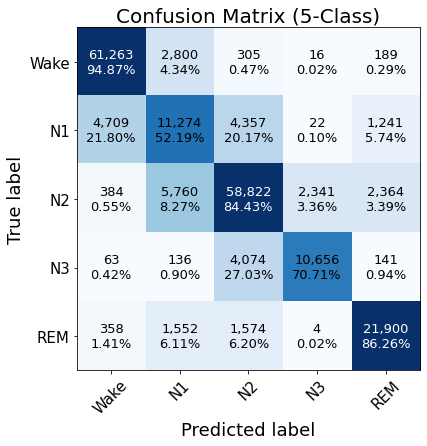

Accuracy 0.8350016555869693
Kappa 0.7736433789299895
Macro F1 Score 0.7833019733428955
G Mean 0.8703210153021095
Sensitivity 0.7914111137390136
Specificity 0.9570988535881042
Class wise F1 Score [0.932820737361908, 0.5228521823883057, 0.8475609421730042, 0.7581913471221924, 0.8550846576690674]
Class wise Sensitivity Score [0.932820737361908, 0.5228521823883057, 0.8475609421730042, 0.7581913471221924, 0.8550846576690674]
Class wise Specificity Score [0.9744457006454468, 0.9409038424491882, 0.9146910309791565, 0.9759147763252258, 0.9795389175415039]


In [81]:
#5 Class
sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels),
                                                5, labels_val_main.shape[0], print_conf_mat=True)

g = g_mean(sens, spec)

acc = accuracy(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

kap = kappa(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")
print(f"Class wise Sensitivity Score {f1_l}")
print(f"Class wise Specificity Score {spec_l}")

In [83]:
#3 Class
label_3 = []
pred_3 = [] 
for i in range (main_all_pred.shape[0]):
    predss = np.argmax(main_all_pred[i], 1)
    # if predss

sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels),
                                                5, labels_val_main.shape[0], print_conf_mat=True)

g = g_mean(sens, spec)

acc = accuracy(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

kap = kappa(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")
print(f"Class wise Sensitivity Score {f1_l}")
print(f"Class wise Specificity Score {spec_l}")

AxisError: axis 1 is out of bounds for array of dimension 1

# Feature Evaluation

In [22]:
val_data_loader = data.DataLoader(val_dataset, batch_size = 32, shuffle = True)

In [23]:
wake = []
s1 = []
s2 = []
s3 = []
rem = []

for batch_idx, data_input in enumerate(val_data_loader):
    eeg,eog,label = data_input
    cur_batch_size = len(eeg)
   
    eeg = torch.moveaxis(eeg,2,0)
    eog = torch.moveaxis(eeg,2,0)
    feats = test_model(eeg.float().to(device), eog.float().to(device))
    
    for i in range(len(label)):
        if label[i]==0:
            wake.append(feats[i].squeeze().detach().cpu().numpy())
        if label[i]==1:
            s1.append(feats[i].squeeze().detach().cpu().numpy())
        if label[i]==2:
            s2.append(feats[i].squeeze().detach().cpu().numpy())
        if label[i]==3:
            s3.append(feats[i].squeeze().detach().cpu().numpy())
        if label[i]==4:
            rem.append(feats[i].squeeze().detach().cpu().numpy())

wake = np.array(wake)
s1 = np.array(s1)
s2 = np.array(s2)
s3 = np.array(s3)
rem = np.array(rem)  

print(wake.shape, s1.shape,s2.shape,s3.shape,rem.shape)
    

(12530, 512) (4269, 512) (12995, 512) (2225, 512) (4638, 512)


In [24]:
from sklearn.manifold import TSNE
features = np.concatenate((wake,s1,s2,s3,rem), axis= 0)
features = features.squeeze()
print(features.shape)
tsne = TSNE(n_components=2).fit_transform(features)
print(tsne.shape)

(36657, 512)
(36657, 2)


In [25]:
def scale_to_01_range(x):
  value_range = (np.max(x) - np.min(x))

  starts_from_zero = x - np.min(x)

  return starts_from_zero / value_range

tx = tsne[:, 0]
ty = tsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

0 12530 32019 36657


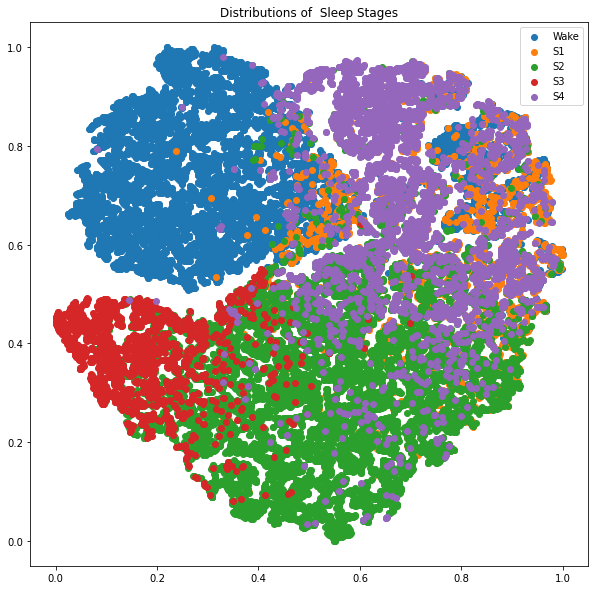

(12530,) (4269,) (12995,)


In [35]:
# initialize a matplotlib plot
fig = plt.figure(figsize = (10,10))

# valset 5 (12530, 512) (4269, 512) (12995, 512) (2225, 512) (4638, 512)

w_start, w_end = 0,12530
s1_start,s1_end = w_end,w_end+4269
s2_start,s2_end = s1_end,s1_end+12995
s3_start,s3_end = s2_end,s2_end+2225
rem_start,rem_end = s3_end,s3_end+4638
print(w_start, w_end,rem_start,rem_end)
plt.scatter(tx[w_start:w_end], ty[w_start:w_end], label = "Wake" )
plt.scatter(tx[s1_start:s1_end], ty[s1_start:s1_end], label = "S1" )
plt.scatter(tx[s2_start:s2_end], ty[s2_start:s2_end], label = "S2" )
plt.scatter(tx[s3_start:s3_end], ty[s3_start:s3_end], label = "S3" )
plt.scatter(tx[rem_start:], ty[rem_start:], label = "S4" )
plt.legend(loc='best')
plt.title("Distributions of  Sleep Stages")

# finally, show the plot
plt.show()

print(tx[w_start:w_end].shape,tx[s1_start:s1_end].shape,tx[s2_start:s2_end].shape)

# Interpretation

In [60]:
val_test_loader = data.DataLoader(val_dataset, batch_size = 2, shuffle = False)

In [33]:
W_corrrect_pred = []
N1_corrrect_pred = []
N2_corrrect_pred = []
N3_corrrect_pred = []
REM_corrrect_pred = []
with torch.no_grad():
    test_model.eval()
    for batch_val_idx, data_val in enumerate(val_test_loader):
        val_eeg,val_eog, val_labels = data_val
        cur_val_batch_size = len(val_eeg)
        pred,_,_ = test_model(val_eeg.float().to(device), val_eog.float().to(device))
        
        for i in range(2):
            # print(i)
            if accuracy(pred[i,:].cpu().view(1,5), val_labels[i].view(1,)) > 0.8:
                if val_labels[i] == 0:
                    W_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
                if val_labels[i] == 1:
                    N1_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
                if val_labels[i] == 2:
                    N2_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
                if val_labels[i] == 3:
                    N3_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
                if val_labels[i] == 4:
                    REM_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
            

                                                    

NameError: name 'val_test_loader' is not defined

In [ ]:
N3_corrrect_pred

[[55, tensor([-3.1220, -0.3104,  3.1078,  3.1695, -4.3973]), tensor(3)],
 [55, tensor([-4.7131, -0.7952,  3.7836,  4.3082, -3.9923]), tensor(3)],
 [56, tensor([-5.1733, -1.0782,  4.0330,  5.7264, -4.1921]), tensor(3)],
 [56, tensor([-4.9426, -1.0226,  3.5361,  6.1372, -3.9696]), tensor(3)],
 [57, tensor([-4.9635, -1.0222,  3.8006,  5.1721, -3.8929]), tensor(3)],
 [57, tensor([-5.4907, -1.1928,  4.3493,  4.8076, -3.7928]), tensor(3)],
 [58, tensor([-4.3034, -0.9683,  3.2990,  5.7366, -4.0854]), tensor(3)],
 [59, tensor([-5.6868, -1.5309,  4.2053,  6.3275, -3.6711]), tensor(3)],
 [60, tensor([-5.6470, -1.4100,  4.5188,  4.6756, -3.4998]), tensor(3)],
 [60, tensor([-4.2252, -1.5959,  3.9270,  6.6813, -4.4633]), tensor(3)],
 [61, tensor([-4.5514, -1.2938,  3.6022,  6.2095, -4.0283]), tensor(3)],
 [61, tensor([-4.8508, -1.8252,  3.5107,  7.2778, -3.2998]), tensor(3)],
 [62, tensor([-4.4366, -1.1997,  3.3880,  6.1910, -3.9359]), tensor(3)],
 [62, tensor([-4.8742, -1.8893,  3.9877,  7.2800, -

torch.Size([2, 1, 1, 3000]) torch.Size([2, 1, 1, 3000]) torch.Size([2]) 3
torch.Size([120])
torch.Size([120])
(120,) (120,)
(3000,)


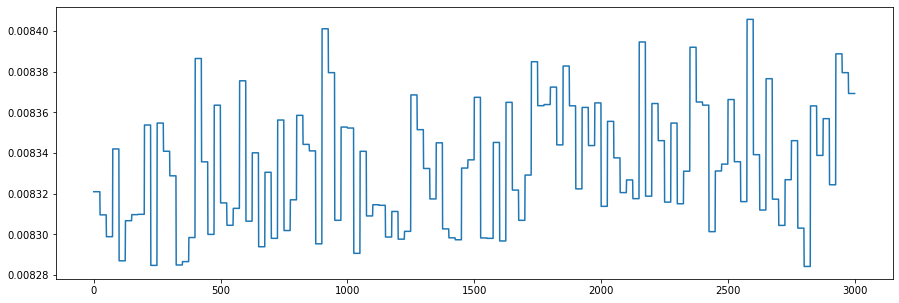

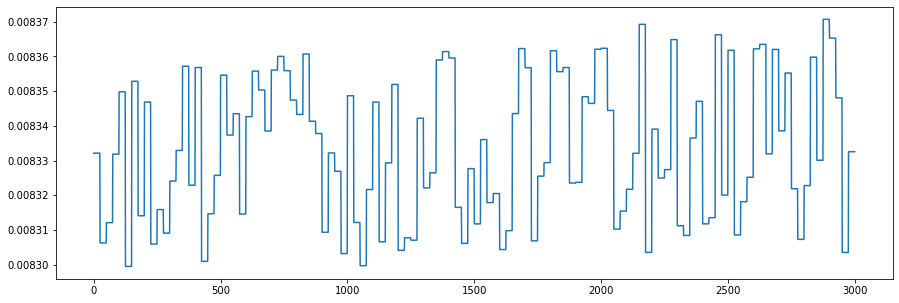

(3000,)
(3000,)


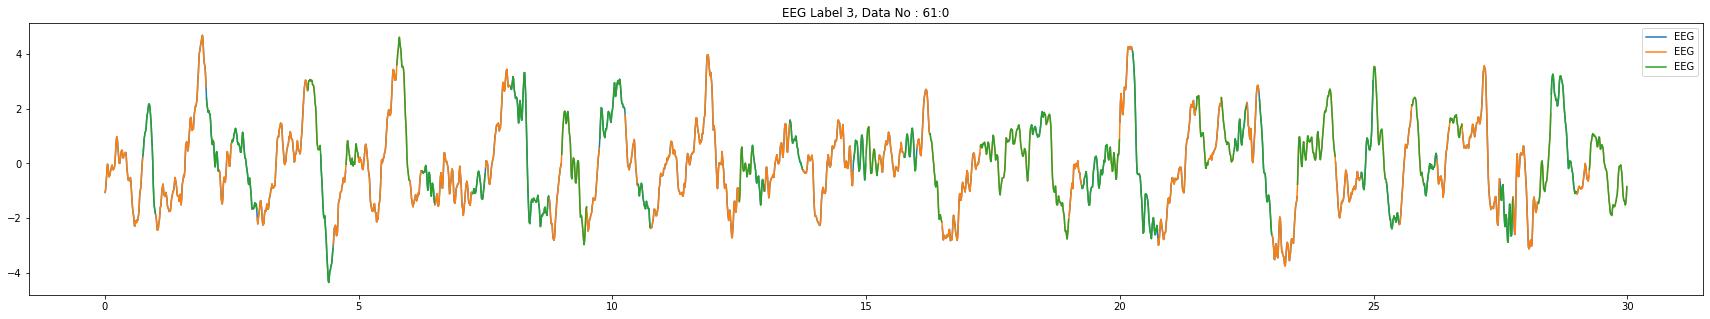

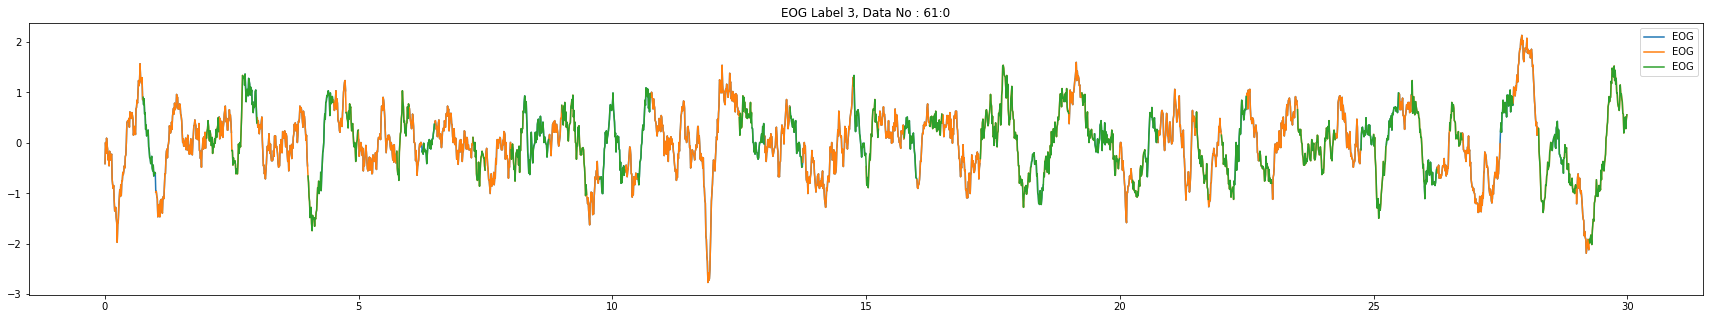

torch.Size([120])
torch.Size([120])
(120,) (120,)
(3000,)


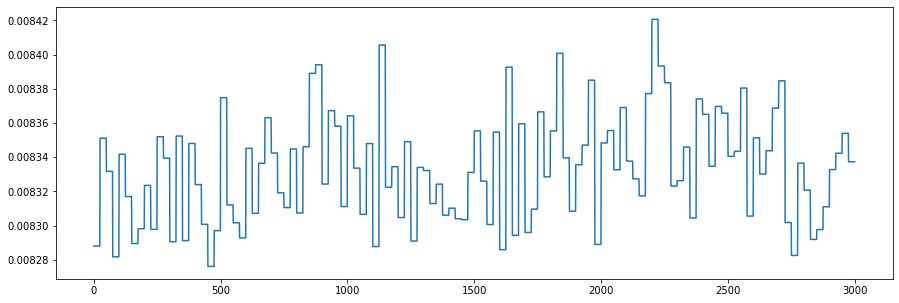

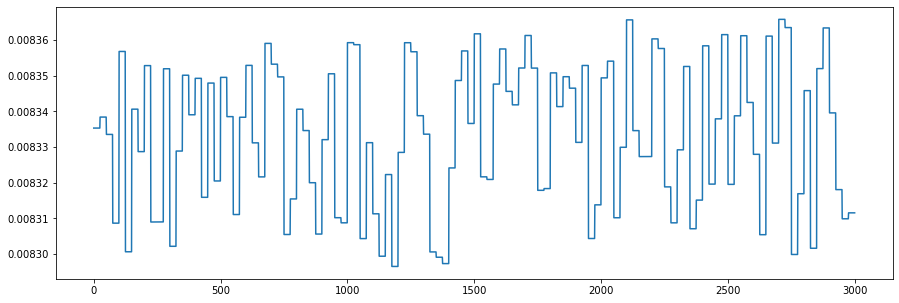

(3000,)
(3000,)


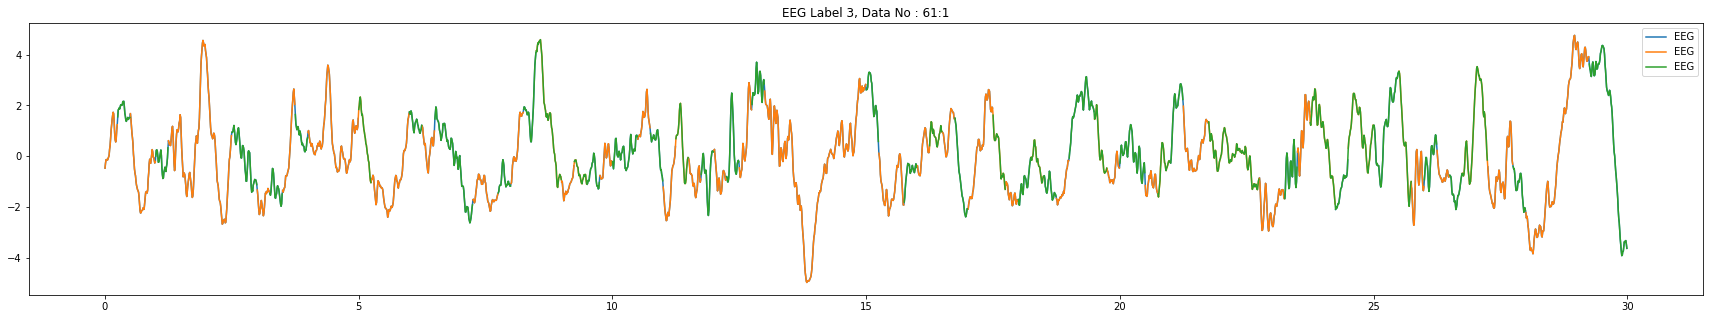

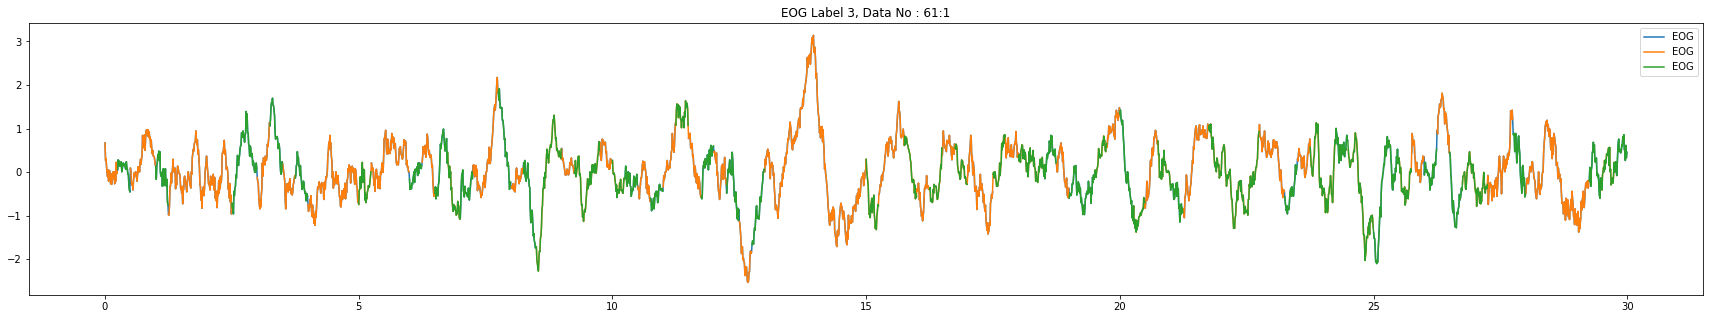

In [192]:
#feat_list = [cross_cls,ff_eeg,ff_eog]
import matplotlib.colors as mcolors
with torch.no_grad():
    test_model.eval()
    for batch_val_idx, data_val in enumerate(val_test_loader):
        val_eeg,val_eog, val_labels = data_val
        cur_val_batch_size = len(val_eeg)
        pred,_,feat_list = test_model(val_eeg.float().to(device), val_eog.float().to(device))

        if batch_val_idx == 61:  #N2  41, #N3 61   #REM 90
            print(val_eeg.shape,val_eog.shape, val_labels.shape,len(feat_list))
            for i in range (2):
                feats = torch.mean(feat_list[1][i][1:],dim = 1)#.detach().cpu().numpy()
                print(feats.shape)
                m = nn.Softmax()
                feats = m(feats).detach().cpu().numpy()

                feats_eog = torch.mean(feat_list[2][i][1:],dim = 1)#.detach().cpu().numpy()
                print(feats_eog.shape)
                m = nn.Softmax()
                feats_eog = m(feats_eog).detach().cpu().numpy()
                # feats = np.mean(feats,axis = 1)
                print(feats.shape,feats_eog.shape)
                feats2 = np.zeros((3000,))
                feats2_eog = np.zeros((3000,))
                for k in range(120):
                    feats2[k*25:(k+1)*25] = feats[k]
                    feats2_eog[k*25:(k+1)*25] = feats_eog[k]
                print(feats2.shape)

                plt.figure(figsize = (15,5))
                plt.plot(feats2)
                plt.show()

                plt.figure(figsize = (15,5))
                plt.plot(feats2_eog)
                plt.show()
                
                ##### EEG ###################
                eeg = val_eeg[i].squeeze().detach().cpu().numpy()
                print(eeg.shape)
                thresh = feats2.mean()
                std_feat2 =  feats2.std()
                # eeg_up1 = np.ma.masked_where(feats2 >= 0.00836, eeg)
                # eeg_up2 = np.ma.masked_where((feats2 < 0.00834) & (feats2 > 0.00832), eeg)
                # eeg_up3 = np.ma.masked_where(feats2 < 0.00832, eeg)
                
                eeg_up1 = np.ma.masked_where(feats2 >= thresh+std_feat2, eeg)
                eeg_up2 = np.ma.masked_where((feats2 < thresh+std_feat2) & (feats2 >=thresh), eeg)
                eeg_up3 = np.ma.masked_where(feats2 < thresh, eeg)

                #### EOG##################
                eog = val_eog[i].squeeze().detach().cpu().numpy()
                print(eog.shape)
                thresh = feats2_eog.mean()
                std_feat2 =  feats2_eog.std()
                # eeg_up1 = np.ma.masked_where(feats2 >= 0.00836, eeg)
                # eeg_up2 = np.ma.masked_where((feats2 < 0.00834) & (feats2 > 0.00832), eeg)
                # eeg_up3 = np.ma.masked_where(feats2 < 0.00832, eeg)
                
                eog_up1 = np.ma.masked_where(feats2 >= thresh+std_feat2, eog)
                eog_up2 = np.ma.masked_where((feats2 < thresh+std_feat2) & (feats2 >=thresh), eog)
                eog_up3 = np.ma.masked_where(feats2 < thresh, eog)
            



             

                

                t = np.arange(0,30,1/100)
                plt.figure(figsize = (30,5))
                plt.plot(t,eeg_up1,t,eeg_up2,t,eeg_up3,label="EEG")
                plt.title(f"EEG Label {val_labels[i].squeeze()}, Data No : {batch_val_idx}:{i}")
                plt.legend()
                plt.show()

                t = np.arange(0,30,1/100)
                plt.figure(figsize = (30,5))
                plt.plot(t,eog_up1,t,eog_up2,t,eog_up3,label="EOG")
                plt.title(f"EOG Label {val_labels[i].squeeze()}, Data No : {batch_val_idx}:{i}")
                plt.legend()
                plt.show()
                # break
            break

In [172]:
feats2.mean()-feats2.std()*1


0.008307585570234255

In [174]:
thresh

0.008333333496314784

In [117]:
feats2[np.logical_and(feats2<0.00836,feats2>=0.00834)]

array([0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835584,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835584,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835584,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835584,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835